## Basic vessel/object-in-motion analytics

#### Vessel data available at: https://marinecadastre.gov/ais/ 

In [9]:
# load data
import pandas as pd

ais_csv = pd.read_csv('ais_data.csv')
ais_csv.head()

### For visualizations of path trajectories, we can explore the data by vesseltype
#### Vessel type information is available here: https://faq.spire.com/determining-ais-ship-type  or here https://unstats.un.org/wiki/download/attachments/57999709/VesselTypeCodes2018.pdf?version=1&modificationDate=1587476467017&api=v2

In [10]:
ais_csv['VesselType'].value_counts()

1001.0    6089235
1004.0     686734
1025.0     522161
30.0       406570
0.0        376957
1002.0     338162
1010.0     110285
70.0       108800
1005.0      69208
7.0         58170
1018.0      43952
1013.0      26017
1024.0      22591
79.0        21757
33.0        18937
110.0        8533
4.0          8212
71.0         3916
1020.0       3077
47.0         1698
74.0         1266
1022.0        510
84.0          318
1003.0        259
80.0          203
72.0          169
1012.0          1
Name: VesselType, dtype: int64

In [11]:
# use this line to look up the most robust vessel datasets for each relevant vesseltype
ais_csv[ais_csv['VesselType'] == 70]['MMSI'].value_counts().head(10)

357058000    22796
371542000    22370
368450000    19797
636016249    11081
356616000     5117
352910000     4157
354213000     1948
351656000      858
371563000      858
235091871      851
Name: MMSI, dtype: int64

### Visualize trajectories using plotly and mapbox 

In [12]:
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

mapbox_access_token = "**********************************************"
px.set_mapbox_access_token(mapbox_access_token)

#### Fishing vessel trajectories

In [13]:
df = ais_csv[ais_csv['MMSI'] == 368219000]

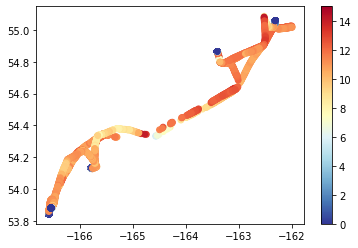

In [14]:
# simple visualization
cm = plt.cm.get_cmap('RdYlBu_r')
z = df['SOG']

sc = plt.scatter(df['LON'], df['LAT'], c=z, vmin=0, vmax=15, s=35, cmap=cm)
plt.colorbar(sc)

In [17]:
# mapbox visualization
fig = px.scatter_mapbox(df, lat="LAT", lon="LON", color="SOG",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6, range_color=[0,15])
fig.update_layout(title='Fishing vessel trajectory')

fig.show()

#### Tugboat trajectories

In [18]:
df = ais_csv[ais_csv['MMSI'] == 367035930]    # 367694000

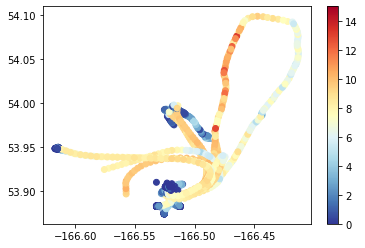

In [19]:
# simple visualization
cm = plt.cm.get_cmap('RdYlBu_r')
z = df['SOG']

sc = plt.scatter(df['LON'], df['LAT'], c=z, vmin=0, vmax=15, s=35, cmap=cm)
plt.colorbar(sc)

In [20]:
# mapbox visualization
fig = px.scatter_mapbox(df, lat="LAT", lon="LON", color="SOG",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=9, range_color=[0,15])
fig.update_layout(title='Tugboat trajectory')

fig.show()

#### Cargo ship trajectories

In [21]:
df = ais_csv[ais_csv['MMSI'] == 351656000]   # 368450000  354213000

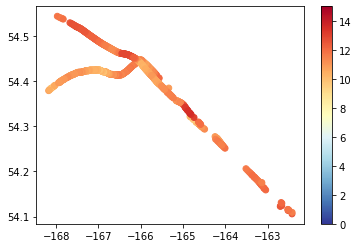

In [22]:
# simple visualization
cm = plt.cm.get_cmap('RdYlBu_r')
z = df['SOG']

sc = plt.scatter(df['LON'], df['LAT'], c=z, vmin=0, vmax=15, s=35, cmap=cm)
plt.colorbar(sc)

In [23]:
# mapbox visualization
fig = px.scatter_mapbox(df, lat="LAT", lon="LON", color="SOG",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=6, range_color=[0,15])
fig.update_layout(title='Cargo ship trajectory')

fig.show()